In [1]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt

#### Sinogram

In [2]:
dcm_img = '/mnt/ssd/python_projects/streamlit_app/pages/images/sino_proj/JasPhan.dcm'

In [3]:
ds = dicom.dcmread(dcm_img)
img = ds.pixel_array.astype(np.float32)
print(img.shape)
sino = img[:,75,:].copy()
sino = np.swapaxes(sino,0,1)
print(sino.shape)

(120, 128, 128)
(128, 120)


float32


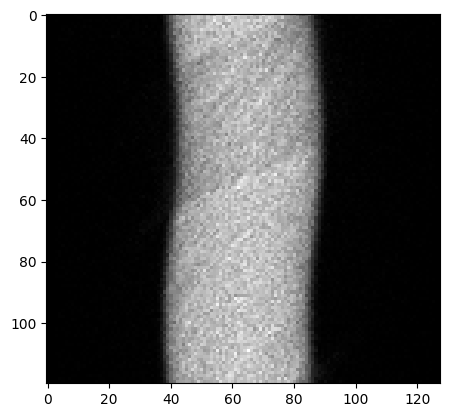

In [7]:
plt.imshow(sino.T, cmap= 'gray')
print(sino.dtype)
# print(sino.max())

In [12]:
np.save('/mnt/ssd/python_projects/streamlit_app/pages/images/recon/JasPhan_02.npy', sino)

uint8


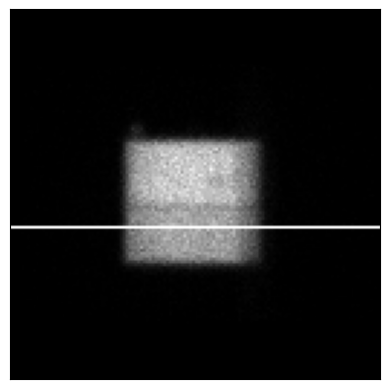

In [4]:
scaled_image = (np.maximum(img, 0) / img.max()) * 255.0
disp_img = np.uint8(scaled_image)
proj_img = disp_img[0,:,:].copy()
proj_img[75,:] = 255.0
plt.imshow(proj_img, cmap= 'gray')
plt.xticks([]), plt.yticks([])
print(proj_img.dtype)

In [17]:
np.save('/mnt/ssd/python_projects/streamlit_app/pages/images/JasPhan_prj_01.npy', proj_img)

#### filter

(256, 256)
(256, 256)
float32
19402.0
uint8
255


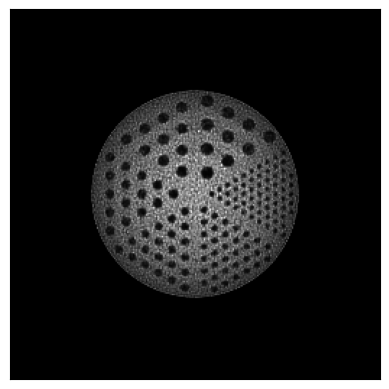

In [35]:
dcm_img = '/mnt/ssd/python_projects/streamlit_app/pages/images/jasphan_osem.dcm'
ds = dicom.dcmread(dcm_img)
img = ds.pixel_array.astype(np.float32)
print(img.shape)
# sino = img[:, 75, :].copy()
# sino = np.swapaxes(sino, 0, 1)
print(img.shape)
plt.imshow(img, cmap= 'gray')
plt.xticks([]), plt.yticks([])
print(img.dtype)
print(img.max())
scaled_image = (np.maximum(img, 0) / img.max()) * 255.0
img = np.uint8(scaled_image)
print(img.dtype)
print(img.max())

In [36]:
from PIL import Image
im = Image.fromarray(img)
im = im.convert("L")
im.save("jasphan_osem.jpeg")

float32
707.0
uint8
255


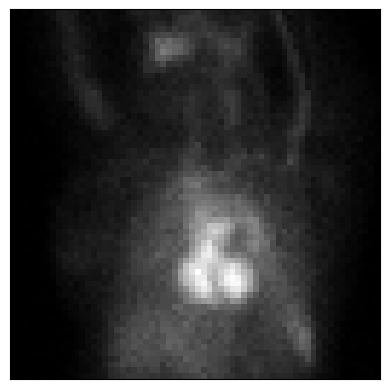

In [30]:
import nibabel as nib

nii_img = "/mnt/ssd/python_projects/streamlit_app/pages/images/MUGA.nii"

nii_obj = nib.nifti1.load(nii_img)
img = nii_obj.get_fdata()
img = np.squeeze(img.T).astype(np.float32)
plt.imshow(img, cmap= 'gray')
plt.xticks([]), plt.yticks([])
print(img.dtype)
print(img.max())
scaled_image = (np.maximum(img, 0) / img.max()) * 255.0
img = np.uint8(scaled_image)
print(img.dtype)
print(img.max())

In [31]:
from PIL import Image
im = Image.fromarray(img)
im = im.convert("L")
im.save("MUGA.jpeg")